In [1]:
# Import the dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

617

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d08339cde13a61017ca266493f003657


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | tezu
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | bengkulu
Processing Record 14 of Set 1 | myitkyina
Processing Record 15 of Set 1 | mahon
Processing Record 16 of Set 1 | carballo
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | ponta do sol
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | tuatapere
Processing Record 21 of Set 1 | saleaula
City not found. Skipping...
Processing Record 22 of Set 1 | sredne

Processing Record 38 of Set 4 | revelstoke
Processing Record 39 of Set 4 | fremont
Processing Record 40 of Set 4 | college
Processing Record 41 of Set 4 | warrington
Processing Record 42 of Set 4 | alice springs
Processing Record 43 of Set 4 | la ligua
Processing Record 44 of Set 4 | tarrafal
Processing Record 45 of Set 4 | ostersund
Processing Record 46 of Set 4 | hastings
Processing Record 47 of Set 4 | port hueneme
Processing Record 48 of Set 4 | ustka
Processing Record 49 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 50 of Set 4 | shchelyayur
City not found. Skipping...
Processing Record 1 of Set 5 | omboue
Processing Record 2 of Set 5 | shelburne
Processing Record 3 of Set 5 | nyurba
Processing Record 4 of Set 5 | tiksi
Processing Record 5 of Set 5 | porosozero
Processing Record 6 of Set 5 | karratha
Processing Record 7 of Set 5 | salalah
Processing Record 8 of Set 5 | esperance
Processing Record 9 of Set 5 | troitsko-pechorsk
Processing Record 10 of Set 5 

Processing Record 30 of Set 8 | broome
Processing Record 31 of Set 8 | nago
Processing Record 32 of Set 8 | narsaq
Processing Record 33 of Set 8 | mujiayingzi
Processing Record 34 of Set 8 | polohy
Processing Record 35 of Set 8 | pilar
Processing Record 36 of Set 8 | deming
Processing Record 37 of Set 8 | kalemie
Processing Record 38 of Set 8 | isangel
Processing Record 39 of Set 8 | cap malheureux
Processing Record 40 of Set 8 | walvis bay
Processing Record 41 of Set 8 | sambava
Processing Record 42 of Set 8 | kurchum
Processing Record 43 of Set 8 | luzhou
Processing Record 44 of Set 8 | dingle
Processing Record 45 of Set 8 | el alto
Processing Record 46 of Set 8 | massakory
Processing Record 47 of Set 8 | gunjur
Processing Record 48 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 49 of Set 8 | tromso
Processing Record 50 of Set 8 | adrar
Processing Record 1 of Set 9 | hambantota
Processing Record 2 of Set 9 | toowoomba
Processing Record 3 of Set 9 | fa

Processing Record 21 of Set 12 | paris
Processing Record 22 of Set 12 | jardim
Processing Record 23 of Set 12 | caucaia
Processing Record 24 of Set 12 | lamu
Processing Record 25 of Set 12 | dzaoudzi
Processing Record 26 of Set 12 | launceston
Processing Record 27 of Set 12 | marechal candido rondon
Processing Record 28 of Set 12 | namatanai
Processing Record 29 of Set 12 | itupiranga
Processing Record 30 of Set 12 | van buren
Processing Record 31 of Set 12 | shishou
Processing Record 32 of Set 12 | farah
Processing Record 33 of Set 12 | lashio
Processing Record 34 of Set 12 | abrau-dyurso
Processing Record 35 of Set 12 | vagur
Processing Record 36 of Set 12 | pandan
Processing Record 37 of Set 12 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 38 of Set 12 | arman
Processing Record 39 of Set 12 | bolgar
Processing Record 40 of Set 12 | la baneza
Processing Record 41 of Set 12 | ribnitz-damgarten
Processing Record 42 of Set 12 | pichayevo
Processing Record 43 of Se

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,77.50,71,16,18.43,PF,2021-07-27 22:06:12
1,Rikitea,-23.1203,-134.9692,74.62,77,100,15.01,PF,2021-07-27 22:09:19
2,East London,-33.0153,27.9116,73.11,26,0,10.04,ZA,2021-07-27 22:06:19
3,Mataura,-46.1927,168.8643,49.48,88,40,0.76,NZ,2021-07-27 22:09:19
4,Bluff,-46.6000,168.3333,49.80,70,17,15.57,NZ,2021-07-27 22:09:20
5,Barrow,71.2906,-156.7887,42.82,84,90,17.27,US,2021-07-27 22:05:57
6,Ushuaia,-54.8000,-68.3000,37.06,93,90,4.61,AR,2021-07-27 22:09:20
7,Hilo,19.7297,-155.0900,80.33,74,90,9.22,US,2021-07-27 22:09:21
8,Tezu,27.9167,96.1667,78.57,79,99,2.98,IN,2021-07-27 22:09:21
9,Iqaluit,63.7506,-68.5145,54.70,50,68,8.99,CA,2021-07-27 22:07:27


In [8]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2021-07-27 22:06:12,-9.8000,-139.0333,77.50,71,16,18.43
1,Rikitea,PF,2021-07-27 22:09:19,-23.1203,-134.9692,74.62,77,100,15.01
2,East London,ZA,2021-07-27 22:06:19,-33.0153,27.9116,73.11,26,0,10.04
3,Mataura,NZ,2021-07-27 22:09:19,-46.1927,168.8643,49.48,88,40,0.76
4,Bluff,NZ,2021-07-27 22:09:20,-46.6000,168.3333,49.80,70,17,15.57
5,Barrow,US,2021-07-27 22:05:57,71.2906,-156.7887,42.82,84,90,17.27
6,Ushuaia,AR,2021-07-27 22:09:20,-54.8000,-68.3000,37.06,93,90,4.61
7,Hilo,US,2021-07-27 22:09:21,19.7297,-155.0900,80.33,74,90,9.22
8,Tezu,IN,2021-07-27 22:09:21,27.9167,96.1667,78.57,79,99,2.98
9,Iqaluit,CA,2021-07-27 22:07:27,63.7506,-68.5145,54.70,50,68,8.99


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

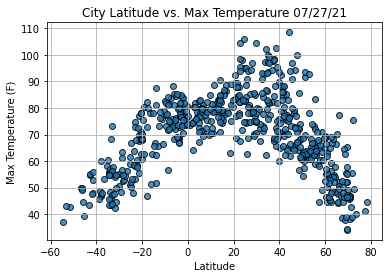

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

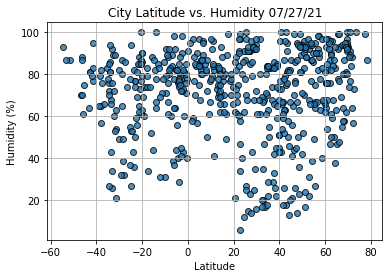

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

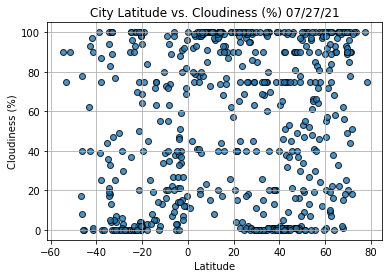

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

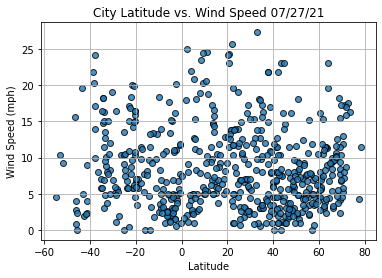

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()